<a href="https://colab.research.google.com/github/Jeansds/Curso_Udemy---Deep-Learning-com-Python-de-A-a-Z/blob/master/Projeto_Auto_Enconders_Base_Mnist_Codificacao_Decodificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [0]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1: ])))

In [0]:
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1: ])))

In [7]:
fator_compactacao = 784 / 32 #784 e a quantidade de entradas
autoencoder = Sequential()
autoencoder.add(Dense(units = 32, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
autoencoder.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 50, batch_size = 256,
                validation_data = (previsores_teste, previsores_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 4s 72us/step - loss: 0.2766 - acc: 0.7842 - val_loss: 0.1921 - val_acc: 0.7992
Epoch 2/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1711 - acc: 0.8029 - val_loss: 0.1529 - val_acc: 0.8051
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1436 - acc: 0.8073 - val_loss: 0.1332 - val_acc: 0.8080
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1280 - acc: 0.8098 - val_loss: 0.1208 - val_acc: 0.8098
Epoch 5/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1177 - acc: 0.8113 - val_loss: 0.1123 - val_acc: 0.8110
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1105 - acc: 0.8123 - val_loss: 0.1063 - val_acc: 0.8118
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1054 - acc: 0.8130 - val_loss: 0.1020 - va

In [11]:
dimensao_original = Input(shape = (784, ))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
imagens_codificadas = encoder.predict(previsores_teste)#codificando as imagens
imagens_decodificadas = autoencoder.predict(previsores_teste)#faz o encode e logo apos faz o decode

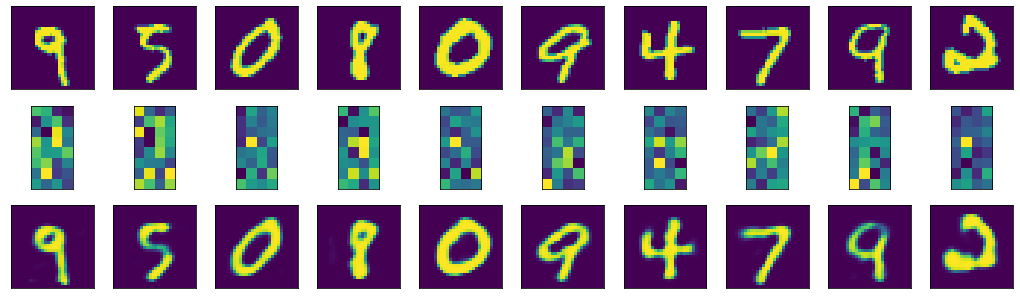

In [21]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)# seleciona 10 imagens e um intervalo de 0 a 10000
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
  # imagem original
  eixo = plt.subplot(10, 10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())
    
  # imagem codificada
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
  plt.xticks(())
  plt.yticks(())
    
  # imagem reconstruÃ­da
  eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
  plt.xticks(())
  plt.yticks(())
    